In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

DIR_NAME = 'ml-1m'
DAT_ENCODING = 'ISO-8859-1'

data_files = {
    'movies': {
        'filename': 'movies.dat',
        'column_names': ['MovieID', 'Title', 'Genres']
    },
    'ratings': {
        'filename': 'ratings.dat',
        'column_names': ['UserID', 'MovieID', 'Rating', 'Timestamp']
    },
    'users': {
        'filename': 'users.dat',
        'column_names': ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
    }
}

def read_data_from(filename, column_names):
        filepath = os.path.join(DIR_NAME, filename)
        df = pd.read_csv(filepath, sep='::', header=None, names=column_names, encoding=DAT_ENCODING, engine='python')
        return df

movies = read_data_from(data_files['movies']['filename'], data_files['movies']['column_names'])
ratings = read_data_from(data_files['ratings']['filename'], data_files['ratings']['column_names'])
users = read_data_from(data_files['users']['filename'], data_files['users']['column_names'])

#users -> ratings is one to many relation
user_ratings = pd.merge(users, ratings, on='UserID', how='inner')

print(user_ratings)

         UserID Gender  Age  Occupation Zip-code  MovieID  Rating  Timestamp
0             1      F    1          10    48067     1193       5  978300760
1             1      F    1          10    48067      661       3  978302109
2             1      F    1          10    48067      914       3  978301968
3             1      F    1          10    48067     3408       4  978300275
4             1      F    1          10    48067     2355       5  978824291
...         ...    ...  ...         ...      ...      ...     ...        ...
1000204    6040      M   25           6    11106     1091       1  956716541
1000205    6040      M   25           6    11106     1094       5  956704887
1000206    6040      M   25           6    11106      562       5  956704746
1000207    6040      M   25           6    11106     1096       4  956715648
1000208    6040      M   25           6    11106     1097       4  956715569

[1000209 rows x 8 columns]


In [55]:
def get_top_10_movies():
    grouped = user_ratings.groupby(['Gender', 'Age', 'MovieID'])
    average_ratings = grouped['Rating'].mean().reset_index()
    top_10_movies = average_ratings.groupby(['Gender', 'Age']).apply(lambda x: x.nlargest(10, 'Rating')).reset_index(drop=True)
    return top_10_movies

top_10_movies = pd.merge(get_top_10_movies(), movies, on='MovieID', how='left')

print(top_10_movies)

    Gender  Age  MovieID  Rating  \
0        F    1       29     5.0   
1        F    1       41     5.0   
2        F    1       42     5.0   
3        F    1       63     5.0   
4        F    1       65     5.0   
..     ...  ...      ...     ...   
135      M   56      559     5.0   
136      M   56      669     5.0   
137      M   56      702     5.0   
138      M   56      751     5.0   
139      M   56      793     5.0   

                                                 Title              Genres  
0                    City of Lost Children, The (1995)    Adventure|Sci-Fi  
1                                   Richard III (1995)           Drama|War  
2                               Dead Presidents (1995)  Action|Crime|Drama  
3    Don't Be a Menace to South Central While Drink...              Comedy  
4                                      Bio-Dome (1996)              Comedy  
..                                                 ...                 ...  
135                         

In [56]:
target_group = top_10_movies[(top_10_movies['Age'] == 18) & (top_10_movies['Gender'] == 'M')]
print(target_group)


   Gender  Age  MovieID  Rating  \
80      M   18       49     5.0   
81      M   18      106     5.0   
82      M   18      369     5.0   
83      M   18      439     5.0   
84      M   18      602     5.0   
85      M   18      633     5.0   
86      M   18      659     5.0   
87      M   18     1420     5.0   
88      M   18     1743     5.0   
89      M   18     1749     5.0   

                                                Title          Genres  
80                       When Night Is Falling (1995)   Drama|Romance  
81         Nobody Loves Me (Keiner liebt mich) (1994)    Comedy|Drama  
82          Mrs. Parker and the Vicious Circle (1994)           Drama  
83                              Dangerous Game (1993)           Drama  
84                      Great Day in Harlem, A (1994)     Documentary  
85                             Denise Calls Up (1995)          Comedy  
86                                 Purple Noon (1960)  Crime|Thriller  
87  Message to Love: The Isle of Wight

C:\Users\glebk\AppData\Local\Temp\ipykernel_11628\4290101424.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=target_group, x='Rating', y='Title', ci=None)
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\glebk\miniconda3\envs\conda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.i

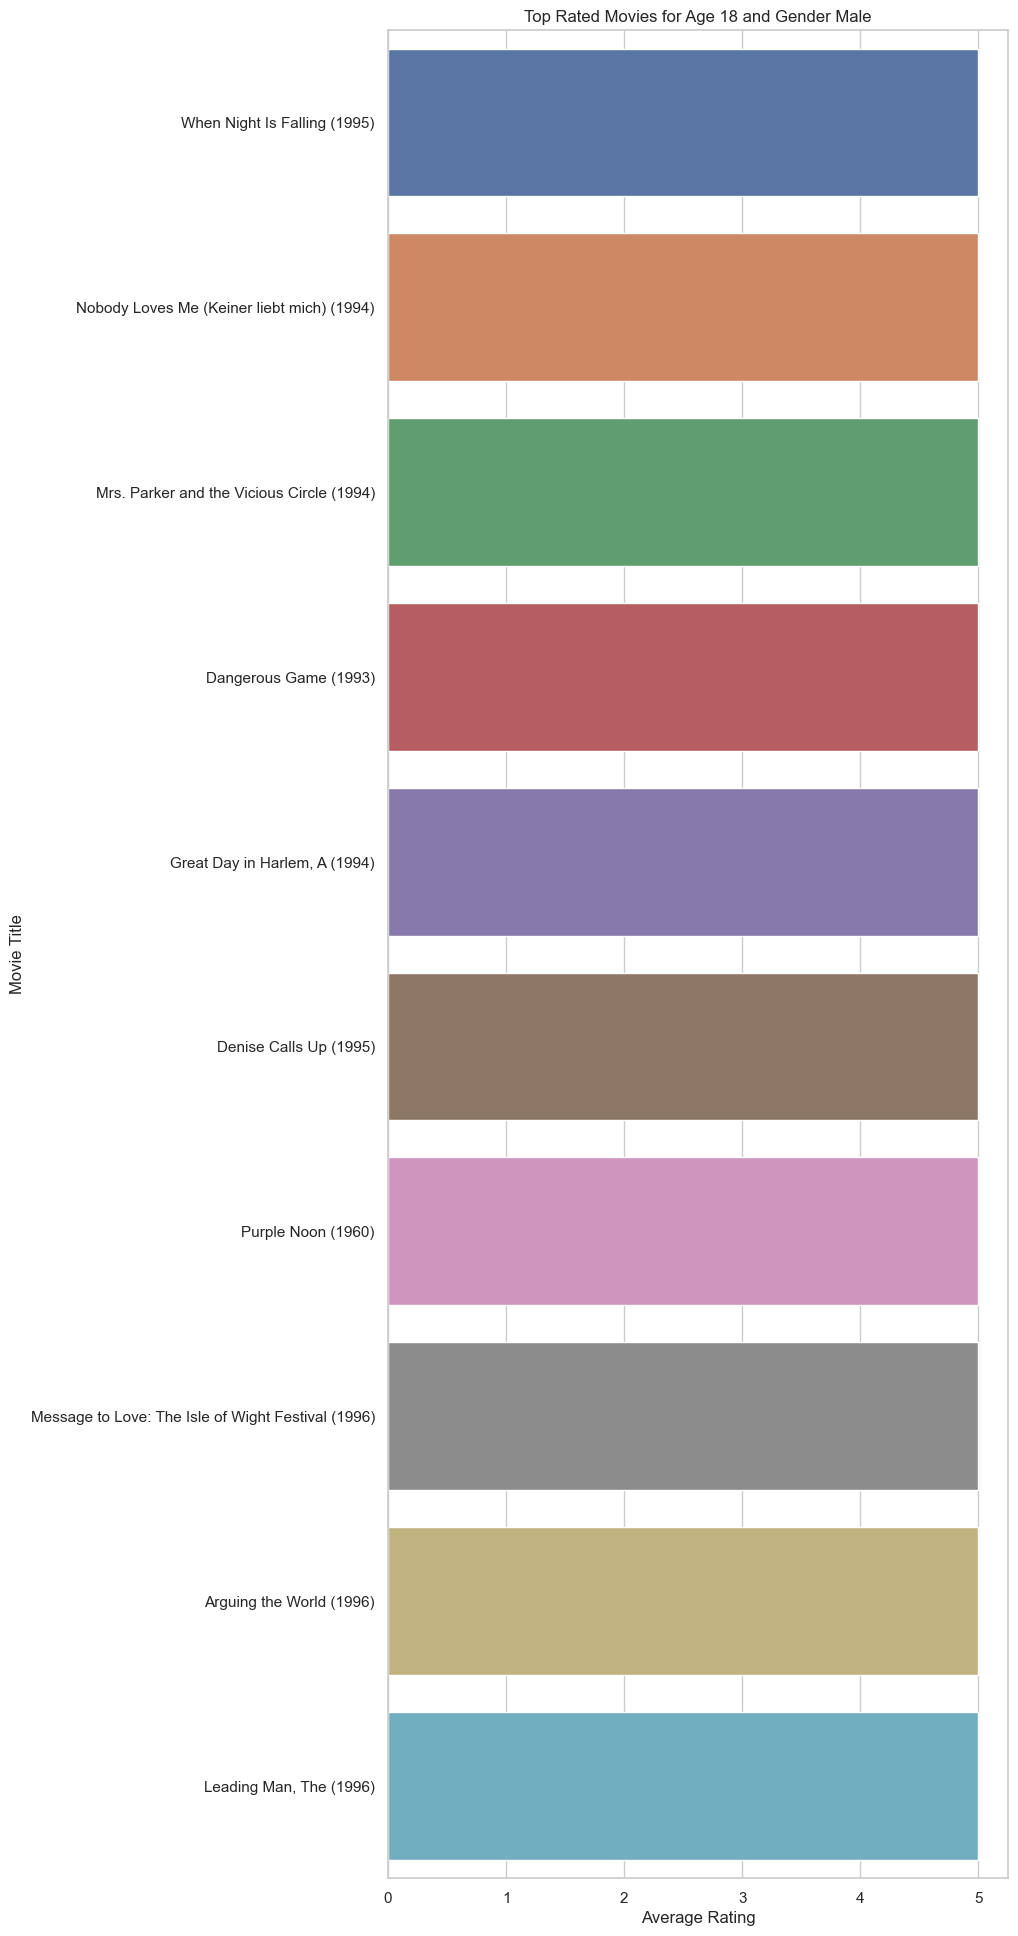

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 24))
sns.barplot(data=target_group, x='Rating', y='Title', ci=None)
plt.title('Top Rated Movies for Age 18 and Gender Male')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()
